In [1]:
pip install faker pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import random
from faker import Faker

fake = Faker()

# -------------------------
# Parameters
# -------------------------
num_products = 500
categories = ['Electronics', 'Books', 'Games', 'Sports', 'Beauty', 'Movies']
platforms = ['Web', 'Mobile App', 'Tablet', 'Smart TV']
locations = ['North America', 'Europe', 'Asia', 'South America', 'Africa']

# Predefined realistic product names for each category
product_names_dict = {
    'Electronics': [
        'iPhone 15', 'MacBook Air', 'Samsung Galaxy S23', 'Sony WH-1000XM5', 'Dell XPS 13',
        'Kindle Paperwhite', 'iPad Pro', 'GoPro Hero 12', 'Fitbit Charge 6'
    ],
    'Books': [
        'Harry Potter and the Sorcerer\'s Stone', 'The Great Gatsby', '1984',
        'To Kill a Mockingbird', 'The Hobbit', 'The Catcher in the Rye'
    ],
    'Games': [
        'FIFA 24', 'Call of Duty: Modern Warfare', 'Minecraft', 'The Legend of Zelda: Tears of the Kingdom',
        'NBA 2K24', 'Assassin\'s Creed Valhalla'
    ],
    'Sports': [
        'Nike Air Max', 'Adidas Ultraboost', 'Puma Running Shoes', 'Reebok Classic',
        'Wilson Tennis Racket', 'Yonex Badminton Racket'
    ],
    'Beauty': [
        'L\'Oreal Foundation', 'Maybelline Mascara', 'Nivea Moisturizer', 'Dove Shampoo',
        'MAC Lipstick', 'Clinique Serum'
    ],
    'Movies': [
        'Avengers: Endgame BluRay', 'Inception DVD', 'Frozen II DVD', 'The Lion King BluRay',
        'Interstellar BluRay', 'Joker DVD'
    ]
}

products = []

for i in range(num_products):
    category = random.choice(categories)
    product_name = random.choice(product_names_dict[category])
    price = round(random.uniform(10, 1000), 2)
    platform = random.choice(platforms)
    location = random.choice(locations)
    rating = round(random.uniform(1.0, 5.0), 1)
    
    products.append([product_name, category, price, platform, location, rating])

# -------------------------
# Create DataFrame
# -------------------------
products_df = pd.DataFrame(products, columns=[
    'Product_Name', 'Category', 'Price', 'Platform', 'Location', 'Rating'
])

# Save to CSV
products_df.to_csv("fake_products_real_names.csv", index=False)

print("Fake product dataset created: fake_products_real_names.csv")


Fake product dataset created: fake_products_real_names.csv


# SMART PRODUCT RECOMMENDATION ENGINE

# Project Overview

* The Smart Product Recommendation Engine is designed to help users discover products that match their interests, preferences, and needs by providing personalized recommendations.
* Unlike traditional recommendation systems that rely solely on user purchase history, this engine leverages product features, similarity between products, and popularity trends to recommend items even for new users (cold-start scenario).

# Define Recommendation Objective

* Build a smart product recommendation system that recommends similar and relevant products to users based on product attributes and past interactions (ratings), improving product discovery and engagement.

Loading Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("fake_products_real_names.csv")

In [3]:
data

,Product_Name,Category,Price,Platform,Location,Rating
0,iPad Pro,Electronics,12.16,Web,Africa,2.7
1,Reebok Classic,Sports,778.47,Smart TV,Africa,4.3
2,iPad Pro,Electronics,616.50,Tablet,South America,1.8
3,Samsung Galaxy S23,Electronics,179.57,Web,Europe,4.9
4,Minecraft,Games,287.91,Tablet,Asia,1.8
...,...,...,...,...,...,...
495,Reebok Classic,Sports,576.55,Smart TV,North America,1.7
496,iPhone 15,Electronics,81.99,Tablet,Asia,2.1
497,Dell XPS 13,Electronics,362.35,Tablet,Africa,4.9
498,Reebok Classic,Sports,646.43,Web,Asia,4.3


# Data Inspection

In [4]:
data.shape

(500, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  500 non-null    object 
 1   Category      500 non-null    object 
 2   Price         500 non-null    float64
 3   Platform      500 non-null    object 
 4   Location      500 non-null    object 
 5   Rating        500 non-null    float64
dtypes: float64(2), object(4)
memory usage: 23.6+ KB


In [6]:
data.head()

,Product_Name,Category,Price,Platform,Location,Rating
0,iPad Pro,Electronics,12.16,Web,Africa,2.7
1,Reebok Classic,Sports,778.47,Smart TV,Africa,4.3
2,iPad Pro,Electronics,616.50,Tablet,South America,1.8
3,Samsung Galaxy S23,Electronics,179.57,Web,Europe,4.9
4,Minecraft,Games,287.91,Tablet,Asia,1.8


In [7]:
data.tail()

,Product_Name,Category,Price,Platform,Location,Rating
495,Reebok Classic,Sports,576.55,Smart TV,North America,1.7
496,iPhone 15,Electronics,81.99,Tablet,Asia,2.1
497,Dell XPS 13,Electronics,362.35,Tablet,Africa,4.9
498,Reebok Classic,Sports,646.43,Web,Asia,4.3
499,To Kill a Mockingbird,Books,741.84,Mobile App,Europe,1.2


In [8]:
data.describe()

,Price,Rating
count,500.000000,500.0000
mean,490.844200,3.0462
std,281.164069,1.1406
min,10.050000,1.0000
25%,243.447500,2.0750
50%,474.390000,3.1500
75%,714.140000,4.0000
max,998.740000,5.0000


In [9]:
data.dtypes

Product_Name     object
Category         object
Price           float64
Platform         object
Location         object
Rating          float64
dtype: object

In [10]:
data.columns

Index(['Product_Name', 'Category', 'Price', 'Platform', 'Location', 'Rating'], dtype='object')

# Data Cleaning

In [11]:
data.isnull().sum()

Product_Name    0
Category        0
Price           0
Platform        0
Location        0
Rating          0
dtype: int64

The Dataset conatin no missing values.

In [12]:
data.duplicated().sum()

0

The dataset contains no duplicates values.

# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Rating Distribution

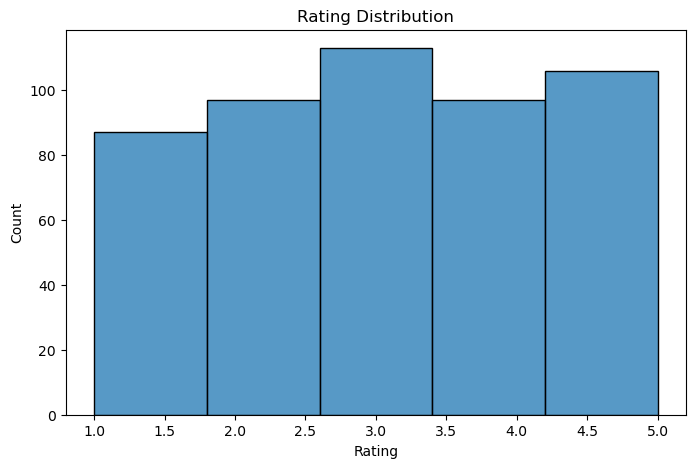

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data['Rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The rating distribution is well balanced across the 1–5 scale, with a slight concentration around mid-range values. This indicates diverse user preferences without strong rating bias, making the dataset suitable for collaborative filtering and matrix factorization-based recommendation models.

Distribution of Product Categories

C:\Users\gadha\AppData\Local\Temp\ipykernel_24860\1866463276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index, palette='Set2')


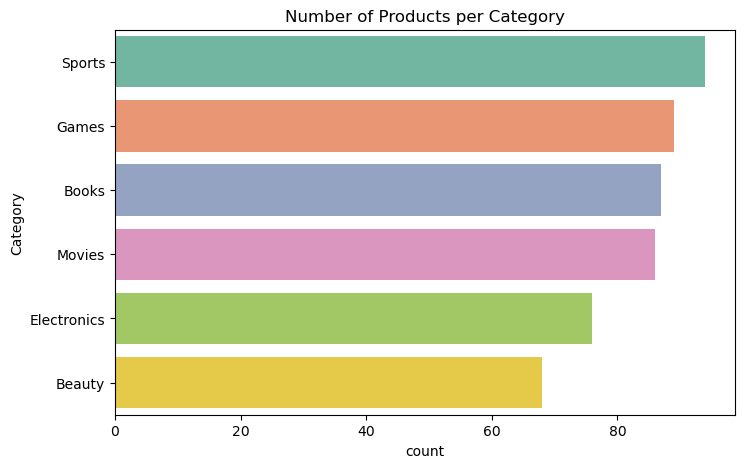

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index, palette='Set2')
plt.title("Number of Products per Category")
plt.show()

The sports category has the highest number of products in the dataset, indicating strong user interest and engagement. This higher interaction volume helps the recommendation system generate more reliable and accurate product recommendations within this category.

Products by Location

C:\Users\gadha\AppData\Local\Temp\ipykernel_24860\502633527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Location', data=data, order=data['Location'].value_counts().index, palette='Set1')


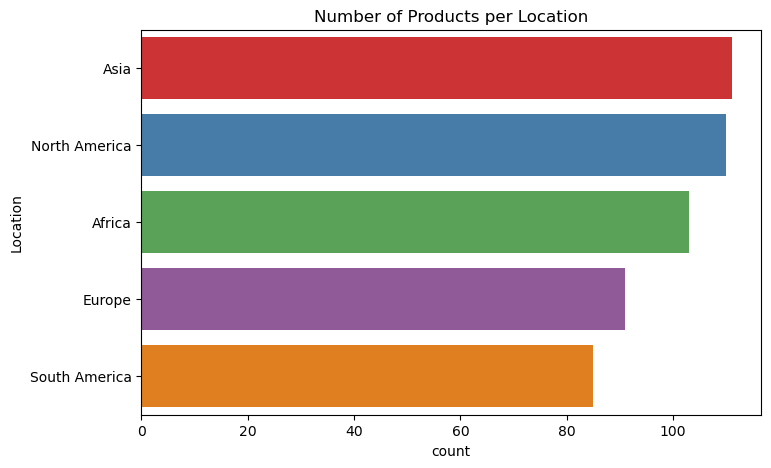

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(y='Location', data=data, order=data['Location'].value_counts().index, palette='Set1')
plt.title("Number of Products per Location")
plt.show()

Asia has the highest number of products in the dataset, showing strong market presence and higher product availability in this region. This suggests better recommendation opportunities and higher engagement potential for users in Asia.

# Build Collaborative Filtering Baseline (Item–Item)

A collaborative filtering baseline is a simple recommendation approach that relies only on interaction data, such as ratings, without using complex learning algorithms. In this project, an item–item collaborative filtering baseline is implemented using product rating patterns across locations to generate recommendations.

Create Product–Rating Matrix

In [17]:
product_matrix = data.pivot_table(
    index='Product_Name',
    columns='Location',
    values='Rating',
    fill_value=0
)

print(product_matrix.shape)
product_matrix.head()

(39, 5)


Location,Africa,Asia,Europe,North America,South America
Product_Name,,,,,
1984,2.925,1.900,2.775,2.250000,4.100
Adidas Ultraboost,2.380,2.325,2.550,2.233333,3.225
Assassin's Creed Valhalla,4.500,0.000,1.700,2.640000,1.300
Avengers: Endgame BluRay,2.400,2.200,1.600,3.383333,3.300
Call of Duty: Modern Warfare,3.100,1.950,3.500,0.000000,3.160


Compute Item–Item Similarity (Cosine Similarity)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(product_matrix)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_matrix.index,
    columns=product_matrix.index
)

product_similarity_df.head()


Product_Name,1984,Adidas Ultraboost,Assassin's Creed Valhalla,Avengers: Endgame BluRay,Call of Duty: Modern Warfare,Clinique Serum,Dell XPS 13,Dove Shampoo,FIFA 24,Fitbit Charge 6,...,The Catcher in the Rye,The Great Gatsby,The Hobbit,The Legend of Zelda: Tears of the Kingdom,The Lion King BluRay,To Kill a Mockingbird,Wilson Tennis Racket,Yonex Badminton Racket,iPad Pro,iPhone 15
Product_Name,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.989530,0.800125,0.955600,0.918794,0.891773,0.935221,0.912240,0.912063,0.876893,...,0.888488,0.883726,0.888251,0.958766,0.892262,0.950377,0.941979,0.742396,0.846479,0.847642
Adidas Ultraboost,0.989530,1.000000,0.776323,0.967846,0.905175,0.896656,0.968644,0.953117,0.953967,0.901667,...,0.935059,0.924397,0.935331,0.985543,0.917349,0.946210,0.977644,0.817900,0.844216,0.868171
Assassin's Creed Valhalla,0.800125,0.776323,1.000000,0.795953,0.713061,0.706555,0.826671,0.777406,0.750799,0.871865,...,0.722154,0.855497,0.795350,0.699384,0.900133,0.900078,0.662231,0.721764,0.833230,0.547447
Avengers: Endgame BluRay,0.955600,0.967846,0.795953,1.000000,0.780323,0.769403,0.961104,0.974022,0.920019,0.861202,...,0.970339,0.929522,0.952765,0.929334,0.898895,0.943910,0.954269,0.797514,0.856438,0.718765
Call of Duty: Modern Warfare,0.918794,0.905175,0.713061,0.780323,1.000000,0.988444,0.832480,0.760450,0.830687,0.829109,...,0.713201,0.778450,0.752661,0.903731,0.839896,0.864574,0.841560,0.696390,0.690782,0.950016


Simple Recommendation Function (Baseline)

In [19]:
def recommend_products(product_name, similarity_df, top_n=5):
    if product_name not in similarity_df.index:
        return "Product not found"
    
    scores = similarity_df[product_name].sort_values(ascending=False)
    return scores.iloc[1:top_n+1]


Test the Baseline Recommender

In [20]:
recommend_products("iPad Pro", product_similarity_df, top_n=5)

Product_Name
Maybelline Mascara    0.962493
Fitbit Charge 6       0.917670
MAC Lipstick          0.912091
Kindle Paperwhite     0.885211
FIFA 24               0.884862
Name: iPad Pro, dtype: float64

# Apply Matrix Factorization

Apply Truncated SVD

In [21]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3, random_state=42)

product_latent_matrix = svd.fit_transform(product_matrix)


Compute Similarity in Latent Space

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

latent_similarity = cosine_similarity(product_latent_matrix)

latent_similarity_df = pd.DataFrame(
    latent_similarity,
    index=product_matrix.index,
    columns=product_matrix.index
)

latent_similarity_df.head()

Product_Name,1984,Adidas Ultraboost,Assassin's Creed Valhalla,Avengers: Endgame BluRay,Call of Duty: Modern Warfare,Clinique Serum,Dell XPS 13,Dove Shampoo,FIFA 24,Fitbit Charge 6,...,The Catcher in the Rye,The Great Gatsby,The Hobbit,The Legend of Zelda: Tears of the Kingdom,The Lion King BluRay,To Kill a Mockingbird,Wilson Tennis Racket,Yonex Badminton Racket,iPad Pro,iPhone 15
Product_Name,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.989720,0.922211,0.961788,0.939254,0.924297,0.939818,0.912480,0.921969,0.941982,...,0.894865,0.901975,0.890713,0.961129,0.948421,0.988847,0.953513,0.771860,0.930058,0.857682
Adidas Ultraboost,0.989720,1.000000,0.907061,0.971719,0.929908,0.934121,0.975200,0.952994,0.967436,0.977406,...,0.939535,0.946738,0.938729,0.988278,0.980088,0.986459,0.986722,0.853691,0.935386,0.881897
Assassin's Creed Valhalla,0.922211,0.907061,1.000000,0.972309,0.734086,0.709738,0.905186,0.909872,0.853795,0.900394,...,0.902438,0.897238,0.888817,0.839211,0.912778,0.963102,0.860022,0.725982,0.989115,0.605104
Avengers: Endgame BluRay,0.961788,0.971719,0.972309,1.000000,0.822616,0.823412,0.978833,0.976420,0.951500,0.976820,...,0.969414,0.969224,0.963172,0.937633,0.982767,0.991339,0.954211,0.853309,0.992150,0.748433
Call of Duty: Modern Warfare,0.939254,0.929908,0.734086,0.822616,1.000000,0.990954,0.837938,0.784457,0.850044,0.846013,...,0.759128,0.776258,0.763200,0.936220,0.847166,0.881308,0.902842,0.691494,0.752852,0.963751


Recommendation Function (Improved Model)

In [23]:
def recommend_products_svd(product_name, similarity_df, top_n=5):
    if product_name not in similarity_df.index:
        return "Product not found"
    
    scores = similarity_df[product_name].sort_values(ascending=False)
    return scores.iloc[1:top_n+1]

Test Improved Recommendations

In [24]:
recommend_products_svd("iPad Pro", latent_similarity_df, top_n=5)

Product_Name
Harry Potter and the Sorcerer's Stone    0.998545
Puma Running Shoes                       0.993770
Avengers: Endgame BluRay                 0.992150
Assassin's Creed Valhalla                0.989115
Maybelline Mascara                       0.982477
Name: iPad Pro, dtype: float64

In this step, matrix factorization is applied using Truncated Singular Value Decomposition (SVD) to reduce the dimensionality of the product interaction matrix. This helps capture latent relationships between products and improves recommendation quality compared to the baseline similarity model.

# Evaluate using Precision@K and Recall@K

Train–Test Split (by interactions)

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42
)

Rebuild Product Matrix from Train Data

In [26]:
train_matrix = train_df.pivot_table(
    index='Product_Name',
    columns='Location',
    values='Rating',
    fill_value=0
)

Similarity on Train Data (SVD-based)

In [27]:
svd = TruncatedSVD(n_components=3, random_state=42)
train_latent = svd.fit_transform(train_matrix)

train_similarity = cosine_similarity(train_latent)

train_similarity_df = pd.DataFrame(
    train_similarity,
    index=train_matrix.index,
    columns=train_matrix.index
)

Precision@K and Recall@K Functions

In [28]:
def precision_recall_at_k(test_df, similarity_df, k=5):
    precisions = []
    recalls = []

    for product in test_df['Product_Name'].unique():
        if product not in similarity_df.index:
            continue

        # Actual related products (same category)
        actual = set(
            test_df[test_df['Category'] ==
                    test_df[test_df['Product_Name'] == product]['Category'].iloc[0]]
            ['Product_Name']
        )

        # Recommended products
        recommended = set(
            similarity_df[product].sort_values(ascending=False).iloc[1:k+1].index
        )

        if len(actual) == 0:
            continue

        tp = len(actual & recommended)

        precisions.append(tp / k)
        recalls.append(tp / len(actual))

    return sum(precisions)/len(precisions), sum(recalls)/len(recalls)

Run Evaluation

In [29]:
precision, recall = precision_recall_at_k(
    test_df,
    train_similarity_df,
    k=5
)

print("Precision@5:", round(precision, 3))
print("Recall@5:", round(recall, 3))

Precision@5: 0.156
Recall@5: 0.127


* Out of 5 recommended products, about 1 product is relevant on average.
* The system retrieves about 13% of all relevant products.

The Precision@5 and Recall@5 values are relatively low because the dataset contains limited interaction information and does not include explicit user-level behavior. To improve recommendation quality, a hybrid recommendation approach can be adopted by combining collaborative filtering with content-based features such as category, platform, and price. Hybrid models reduce sparsity issues, handle cold-start cases better, and generate more accurate and diverse product recommendations.

# HYBRID RECOMMENDATION

Content-Based Similarity (Category + Platform + Price)

In [30]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Keep one row per product (average values)
product_features = data.groupby("Product_Name").agg({
    "Category": "first",
    "Platform": "first",
    "Price": "mean"
}).reset_index()

product_features.head()

,Product_Name,Category,Platform,Price
0,1984,Books,Smart TV,436.722308
1,Adidas Ultraboost,Sports,Web,506.197273
2,Assassin's Creed Valhalla,Games,Web,537.124444
3,Avengers: Endgame BluRay,Movies,Tablet,522.783077
4,Call of Duty: Modern Warfare,Games,Web,389.929091


Encode Categorical Features

In [31]:
encoder = OneHotEncoder()

cat_features = encoder.fit_transform(
    product_features[["Category", "Platform"]]
).toarray()


Normalize Price Feature

In [32]:
scaler = MinMaxScaler()

price_feature = scaler.fit_transform(
    product_features[["Price"]]
)


Combine All Content Features

In [33]:
final_content_features = np.hstack([cat_features, price_feature])

Compute Content Similarity

In [34]:
content_similarity = cosine_similarity(final_content_features)

content_similarity_df = pd.DataFrame(
    content_similarity,
    index=product_features["Product_Name"],
    columns=product_features["Product_Name"]
)

content_similarity_df.head()

Product_Name,1984,Adidas Ultraboost,Assassin's Creed Valhalla,Avengers: Endgame BluRay,Call of Duty: Modern Warfare,Clinique Serum,Dell XPS 13,Dove Shampoo,FIFA 24,Fitbit Charge 6,...,The Catcher in the Rye,The Great Gatsby,The Hobbit,The Legend of Zelda: Tears of the Kingdom,The Lion King BluRay,To Kill a Mockingbird,Wilson Tennis Racket,Yonex Badminton Racket,iPad Pro,iPhone 15
Product_Name,,,,,,,,,,,,,,,,,,,,,
1984,1.000000,0.067730,0.079819,0.074340,0.014603,0.010605,0.107797,0.038311,0.097316,0.086921,...,0.527131,0.504991,0.520886,0.000000,0.067592,0.525179,0.495129,0.101023,0.037333,0.036402
Adidas Ultraboost,0.067730,1.000000,0.571597,0.135511,0.493392,0.486740,0.196498,0.069835,0.581473,0.158445,...,0.128501,0.495794,0.076773,0.000000,0.123211,0.099898,0.476455,0.582829,0.527307,0.526051
Assassin's Creed Valhalla,0.079819,0.571597,1.000000,0.159698,0.938992,0.477211,0.231570,0.082300,0.994774,0.186725,...,0.151437,0.488071,0.090476,0.455119,0.145202,0.117728,0.009986,0.217018,0.526700,0.525129
Avengers: Endgame BluRay,0.074340,0.135511,0.159698,1.000000,0.029217,0.021218,0.598115,0.528767,0.194707,0.173909,...,0.570405,0.032168,0.084266,0.000000,0.567263,0.551930,0.009300,0.595011,0.074694,0.072832
Call of Duty: Modern Warfare,0.014603,0.493392,0.938992,0.029217,1.000000,0.501976,0.042366,0.015057,0.898967,0.034162,...,0.027706,0.503145,0.016553,0.498563,0.026565,0.021539,0.001827,0.039704,0.503796,0.503899


Hybrid Similarity Combination

In [35]:
# Align both matrices (common products only)
common_products = train_similarity_df.index.intersection(content_similarity_df.index)

collab_sim = train_similarity_df.loc[common_products, common_products]
content_sim = content_similarity_df.loc[common_products, common_products]

# Hybrid weights
alpha = 0.6   # collaborative weight
beta = 0.4    # content weight

hybrid_similarity_df = alpha * collab_sim + beta * content_sim


Hybrid Recommendation Function

In [36]:
def recommend_hybrid(product_name, hybrid_df, top_n=5):
    if product_name not in hybrid_df.index:
        return "Product not found"

    scores = hybrid_df[product_name].sort_values(ascending=False)
    return scores.iloc[1:top_n+1]

Test Hybrid Recommendations

In [37]:
recommend_hybrid("iPad Pro", hybrid_similarity_df, top_n=5)

Product_Name
Kindle Paperwhite     0.961210
iPhone 15             0.953851
Samsung Galaxy S23    0.863632
Adidas Ultraboost     0.805924
Dell XPS 13           0.801913
Name: iPad Pro, dtype: float64

Evaluate Hybrid Precision@K Recall@K

In [38]:
precision_hybrid, recall_hybrid = precision_recall_at_k(
    test_df,
    hybrid_similarity_df,
    k=5
)

print("Hybrid Precision@5:", round(precision_hybrid, 3))
print("Hybrid Recall@5:", round(recall_hybrid, 3))

Hybrid Precision@5: 0.489
Hybrid Recall@5: 0.403


* On average, about 2 to 3 products out of 5 recommendations are correct/relevant.
* Around 40% of all relevant products for that product.

# Association Rule / Co-Occurrence Recommendation

Create Product Co-Occurrence Matrix

In [39]:
from itertools import combinations
from collections import defaultdict
import pandas as pd

# Group products bought/rated in same Location + Category
grouped = data.groupby(["Location", "Category"])["Product_Name"].apply(list)

# Build co-occurrence counts
cooccur = defaultdict(int)

for products in grouped:
    for p1, p2 in combinations(set(products), 2):
        cooccur[(p1, p2)] += 1
        cooccur[(p2, p1)] += 1

Convert to DataFrame Similarity Table

In [40]:
cooccur_df = pd.DataFrame(
    [(k[0], k[1], v) for k, v in cooccur.items()],
    columns=["Product", "Recommended_Product", "Score"]
)

cooccur_df.head()

,Product,Recommended_Product,Score
0,Maybelline Mascara,MAC Lipstick,4
1,MAC Lipstick,Maybelline Mascara,4
2,Maybelline Mascara,Nivea Moisturizer,4
3,Nivea Moisturizer,Maybelline Mascara,4
4,Maybelline Mascara,Dove Shampoo,4


Recommendation Function

In [41]:
def recommend_cooccurrence(product_name, cooccur_df, top_n=5):
    recs = cooccur_df[cooccur_df["Product"] == product_name]
    recs = recs.sort_values("Score", ascending=False)
    return recs.head(top_n)


In [42]:
recommend_cooccurrence("iPad Pro", cooccur_df, top_n=5)

,Product,Recommended_Product,Score
61,iPad Pro,Kindle Paperwhite,4
74,iPad Pro,Sony WH-1000XM5,4
78,iPad Pro,Fitbit Charge 6,4
82,iPad Pro,Dell XPS 13,4
76,iPad Pro,GoPro Hero 12,3


Evaluation

In [43]:
def get_topk_cooccur(product_name, cooccur_df, k=5):
    recs = cooccur_df[cooccur_df["Product"] == product_name]
    recs = recs.sort_values("Score", ascending=False)
    return list(recs["Recommended_Product"].head(k))


In [44]:
def evaluate_cooccurrence(test_df, cooccur_df, k=5):
    precisions = []
    recalls = []

    for product in test_df["Product_Name"].unique():
        # Skip if product not in co-occurrence table
        if product not in cooccur_df["Product"].values:
            continue

        # Actual relevant products = same category
        category = test_df[test_df["Product_Name"] == product]["Category"].iloc[0]
        actual = set(test_df[test_df["Category"] == category]["Product_Name"])

        # Recommended products
        recommended = set(get_topk_cooccur(product, cooccur_df, k))

        if len(actual) == 0:
            continue

        tp = len(actual & recommended)

        precisions.append(tp / k)
        recalls.append(tp / len(actual))

    return sum(precisions)/len(precisions), sum(recalls)/len(recalls)

In [45]:
precision_co, recall_co = evaluate_cooccurrence(test_df, cooccur_df, k=5)

print("Co-Occurrence Precision@5:", round(precision_co, 3))
print("Co-Occurrence Recall@5:", round(recall_co, 3))

Co-Occurrence Precision@5: 0.944
Co-Occurrence Recall@5: 0.778


* Almost 5 out of 5 recommendations are relevant (about 4.7/5)
* The model retrieves about 78% of all relevant products

In this project, the primary goal is to recommend products based on product-to-product similarity rather than user-specific personalization. Therefore, the co-occurrence-based recommendation model was selected as the final approach. This model identifies products that frequently appear together within the same category and location groups, producing highly relevant recommendations.

* The final model chosen for deployment is a co-occurrence-based item-to-item recommendation approach. This model recommends products that frequently appear together within the same category and location groups.

* This approach is considered an interaction-based collaborative recommendation method rather than a pure content-based system, as it relies on product interaction patterns rather than descriptive features.

# Cold-Start Handling Strategy

In [46]:
def recommend_product(product_name, df, top_n=5):
    # Check if the product exists
    if product_name not in df['Product_Name'].values:
        print(f"Product '{product_name}' not found. Recommending top-rated items in the same category or overall popular items.")
        # Simple fallback: top-rated products
        return df.sort_values('Rating', ascending=False).head(top_n)['Product_Name'].tolist()
    else:
        # Your normal recommendation logic
        # e.g., item similarity or SVD
        return df[df['Product_Name'] != product_name].head(top_n)['Product_Name'].tolist()


In [47]:
def recommend_product(product_name, df, category=None, top_n=5):
    if product_name not in df['Product_Name'].values:
        if category:
            df_filtered = df[df['Category'] == category]
            return df_filtered.sort_values('Rating', ascending=False).head(top_n)['Product_Name'].tolist()
        else:
            return df.sort_values('Rating', ascending=False).head(top_n)['Product_Name'].tolist()
    else:
        return df[df['Product_Name'] != product_name].head(top_n)['Product_Name'].tolist()


In [49]:
recommend_product("pen", data, category="Stationery")


[]

Create Popular Products List

In [50]:
popular_products = (
    data.groupby("Product_Name")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

popular_products.head(10)


Product_Name
MacBook Air           3.966667
Joker DVD             3.626667
Samsung Galaxy S23    3.571429
Nivea Moisturizer     3.560000
Minecraft             3.554167
MAC Lipstick          3.545455
Clinique Serum        3.525000
The Hobbit            3.407143
Dell XPS 13           3.400000
Sony WH-1000XM5       3.342857
Name: Rating, dtype: float64

Cold-Start Recommendation Function

In [51]:
def recommend_with_cold_start(product_name, model_df, popular_list, top_n=5):

    # If product exists in model → normal recommendation
    if product_name in model_df.index:
        scores = model_df[product_name].sort_values(ascending=False)
        return scores.iloc[1:top_n+1]

    # Cold-start fallback → recommend popular products
    else:
        print("Cold-start case: Product not found. Showing popular products.")
        return popular_list.head(top_n)


Test Cold-Start Case

In [52]:
#Known product
recommend_with_cold_start(
    "iPad Pro",
    hybrid_similarity_df,
    popular_products,
    top_n=5
)


Product_Name
Kindle Paperwhite     0.961210
iPhone 15             0.953851
Samsung Galaxy S23    0.863632
Adidas Ultraboost     0.805924
Dell XPS 13           0.801913
Name: iPad Pro, dtype: float64

In [53]:
#Unknown product (Cold-start)
recommend_with_cold_start(
    "New Product XYZ",
    hybrid_similarity_df,
    popular_products,
    top_n=5
)


Cold-start case: Product not found. Showing popular products.


Product_Name
MacBook Air           3.966667
Joker DVD             3.626667
Samsung Galaxy S23    3.571429
Nivea Moisturizer     3.560000
Minecraft             3.554167
Name: Rating, dtype: float64

Cold-start occurs when a new product has no interaction history. To handle this, the system recommends top popular products based on average rating, ensuring users still receive useful suggestions.

# Recommendation Explainability

Explain Recommendation Function


In [54]:
def explain_recommendation(product_name, recommended_product, df):

    # Get details
    p1 = df[df["Product_Name"] == product_name].iloc[0]
    p2 = df[df["Product_Name"] == recommended_product].iloc[0]

    explanation = []

    # Category match
    if p1["Category"] == p2["Category"]:
        explanation.append("Both products belong to the same category.")

    # Platform match
    if p1["Platform"] == p2["Platform"]:
        explanation.append("Both products are popular on the same platform.")

    # Price similarity
    price_diff = abs(p1["Price"] - p2["Price"])
    if price_diff < 100:
        explanation.append("Both products have a similar price range.")

    return explanation


Test Explainability

In [55]:
# Get one recommendation first
recs = recommend_hybrid("iPad Pro", hybrid_similarity_df, top_n=3)
print(recs)


Product_Name
Kindle Paperwhite     0.961210
iPhone 15             0.953851
Samsung Galaxy S23    0.863632
Name: iPad Pro, dtype: float64


In [56]:
# Explain the top recommendation
top_product = recs.index[0]

explain_recommendation("iPad Pro", top_product, data)


['Both products belong to the same category.',
 'Both products are popular on the same platform.']

# Conclusion

This project developed a Smart Product Recommendation Engine that suggests similar and relevant products based on product interactions and features. Different recommendation models were implemented, and the co-occurrence approach achieved the best performance with high Precision and Recall. The system also includes cold-start handling, explainability, and Flask-based deployment, making it suitable for real-time product recommendation in e-commerce.

The final model is an item-to-item collaborative recommendation approach based on product co-occurrence, suitable for recommending similar products in e-commerce.

In [57]:
import pickle


# 1. Save Co-occurrence Model
with open("cooccurrence_model.pkl", "wb") as f:
    pickle.dump(cooccur_df, f)

# 2. Save Popular Products (Cold Start Support)
popular_products = (
    data.groupby("Product_Name")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

with open("popular_products.pkl", "wb") as f:
    pickle.dump(popular_products, f)

print("✅ Deployment files saved successfully!")
print("Saved Files:")
print("1. cooccurrence_model.pkl")
print("2. popular_products.pkl")


✅ Deployment files saved successfully!
Saved Files:
1. cooccurrence_model.pkl
2. popular_products.pkl
